In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

from sklearn.tree import DecisionTreeClassifier


In [2]:
# Load dataset
df = pd.read_csv("data.csv")

# Encode target (M -> 1, B -> 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [5]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[67  4]
 [ 4 39]]


In [6]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))


Accuracy : 0.9298245614035088
Precision: 0.9069767441860465
Recall   : 0.9069767441860465
F1-Score : 0.9069767441860465


ROC-AUC Score: 0.9253193580085161


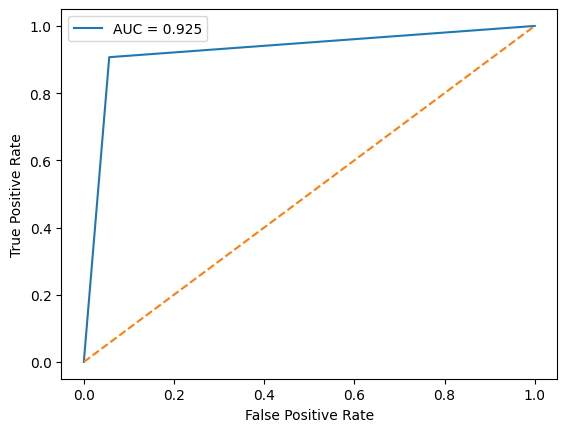

In [7]:
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

print("ROC-AUC Score:", auc)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [8]:
cv_scores = cross_val_score(
    model, X, y, cv=5, scoring="f1"
)

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


Cross-Validation F1 Scores: [0.88888889 0.88095238 0.88095238 0.92857143 0.88172043]
Mean F1 Score: 0.8922171018945212


In [9]:
print("\nBias-Variance Analysis:")
for depth in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc = dt.score(X_train, y_train)
    test_acc = dt.score(X_test, y_test)
    print(f"Depth {depth}: Train={train_acc:.2f}, Test={test_acc:.2f}")



Bias-Variance Analysis:
Depth 1: Train=0.92, Test=0.89
Depth 2: Train=0.93, Test=0.93
Depth 3: Train=0.98, Test=0.94
Depth 4: Train=1.00, Test=0.94
Depth 5: Train=1.00, Test=0.93
Depth 6: Train=1.00, Test=0.94
Depth 7: Train=1.00, Test=0.93
Depth 8: Train=1.00, Test=0.93
Depth 9: Train=1.00, Test=0.93
Depth 10: Train=1.00, Test=0.93
